In [1]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.signal import savgol_filter

#Suavización Exponencial
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Sarimax
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

warnings.filterwarnings('ignore')



In [2]:
confirmed_df = pd.read_csv('data/time_series_covid19_confirmed_global.csv')
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [3]:
deaths_df= pd.read_csv('data/time_series_covid19_deaths_global.csv')
cols = deaths_df.columns
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [4]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
confirmed.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [5]:
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [6]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1143)

In [7]:
# Creación de las series de tiempo
world_cases = []
total_deaths = []
mortality_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)

world_cases_df = pd.DataFrame([dates, world_cases])
world_cases_df = world_cases_df.transpose()
world_cases_df.columns = ['dates', 'cases']

total_deaths_df = pd.DataFrame([dates, total_deaths])
total_deaths_df = total_deaths_df.transpose()
total_deaths_df.columns = ['dates', 'deaths']

mortality_rate_df = pd.DataFrame([dates, mortality_rate])
mortality_rate_df = mortality_rate_df.transpose()
mortality_rate_df.columns = ['dates', 'mortality rate']

In [8]:
world_cases_df.head()

,dates,cases
0,1/22/20,557
1,1/23/20,657
2,1/24/20,944
3,1/25/20,1437
4,1/26/20,2120


#### Gráficos de Las Series

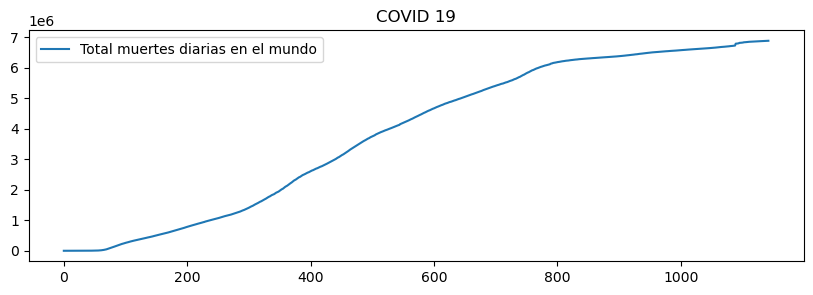

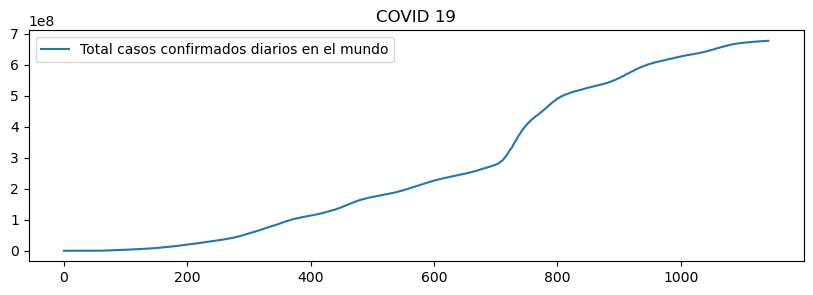

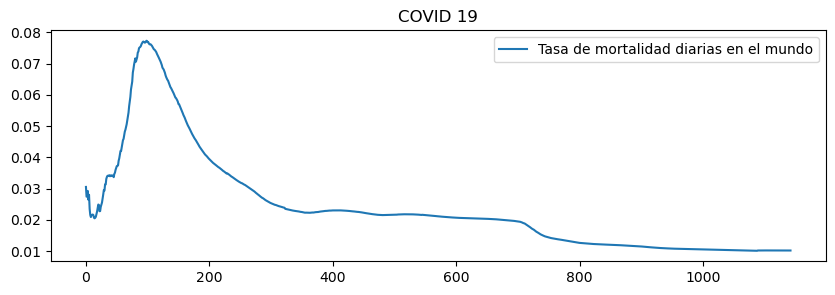

In [9]:
plt.figure(figsize=(10,3))
plt.plot(total_deaths_df.deaths, label = 'Total muertes diarias en el mundo')
plt.title('COVID 19')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.plot(world_cases_df.cases, label = 'Total casos confirmados diarios en el mundo')
plt.title('COVID 19')
plt.legend()
plt.show()

plt.figure(figsize=(10,3))
plt.plot(mortality_rate_df['mortality rate'], label = 'Tasa de mortalidad diarias en el mundo')
plt.title('COVID 19')
plt.legend()
plt.show()

#### Función para calcular los incrementos diarios

In [10]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d

#### Función de filtrado

In [11]:
def maFilter(x, N):
    xTemp = np.zeros(len(x) + (N - 1))
    xTemp[(N - 1):] = x
    y = np.zeros(len(x))

    for i in range(0, len(x)):
        y[i] = xTemp[i : i + N].sum()/float(N)
    return y

In [12]:
window = 7

#Casos
world_daily_increase = daily_increase(world_cases_df.cases)
world_daily_increase_avg = maFilter(world_daily_increase, window)

#Muertes
world_daily_deaths = daily_increase(total_deaths_df.deaths)
world_daily_deaths_avg = maFilter(world_daily_deaths, window)

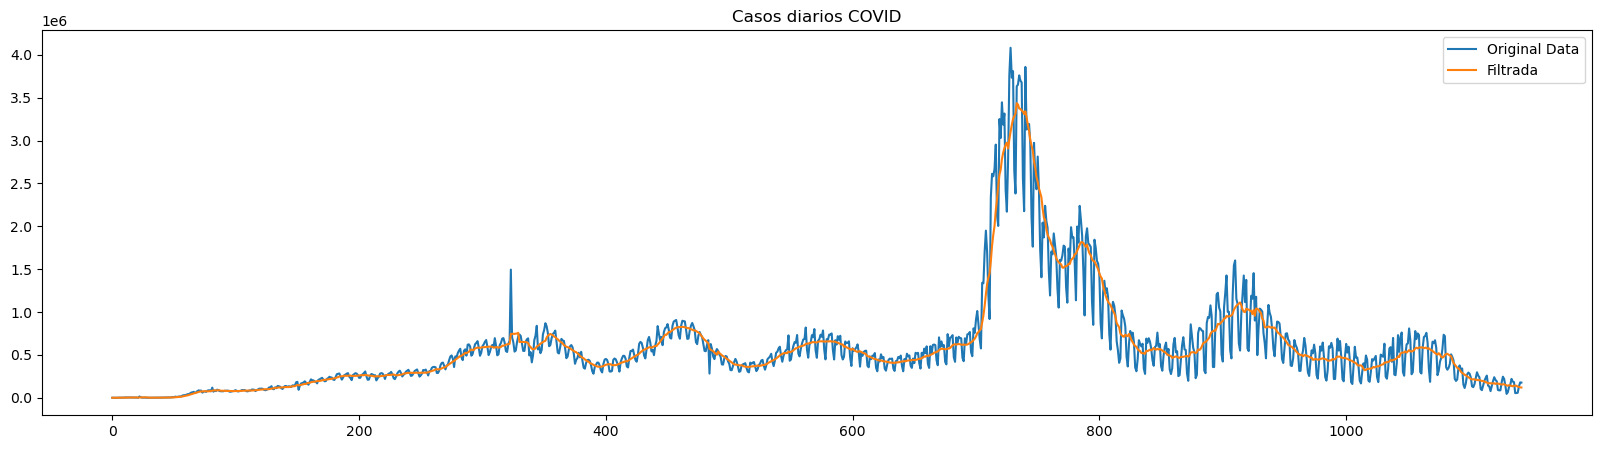

In [13]:
plt.figure(figsize=(20,5))
plt.plot(world_daily_increase, label='Original Data')
plt.plot(world_daily_increase_avg, label= 'Filtrada')
plt.title('Casos diarios COVID')
plt.legend()
plt.show()

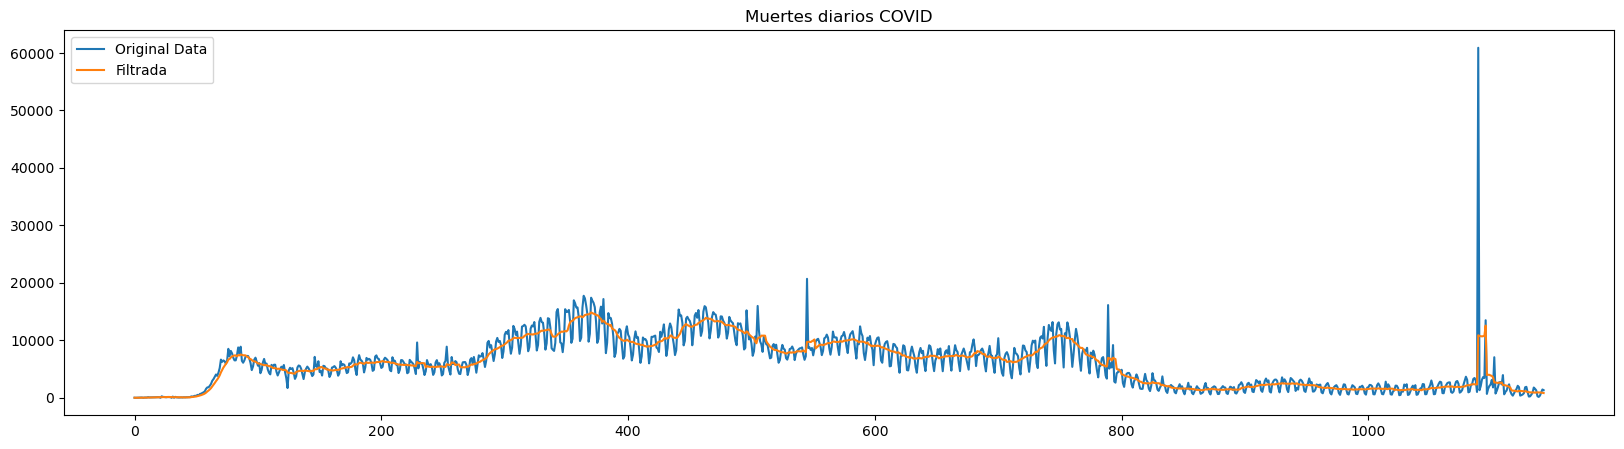

In [14]:
plt.figure(figsize=(20,5))
plt.plot(world_daily_deaths, label='Original Data')
plt.plot(world_daily_deaths_avg, label= 'Filtrada')
plt.title('Muertes diarios COVID')
plt.legend()
plt.show()

# Modelos para Trabajar con Series de Tiempo

## Suavización Exponencial Simple

Supone que el valor siguiente de una serie depende exclusivamente de su valor pasado

In [15]:
world_deaths_increase_df = pd.DataFrame({'Date':np.array(dates), 'deaths': np.array(world_daily_deaths)})
world_deaths_increase_df.describe()


,deaths
count,1143.000000
mean,6020.824147
std,4451.940318
min,1.000000
25%,2177.000000
50%,5839.000000
75%,8773.000000
max,60903.000000


In [16]:
world_deaths_increase_df[world_deaths_increase_df['deaths'] == world_deaths_increase_df['deaths'].max()]

,Date,deaths
1089,1/15/23,60903



## Suavización Exponencial Holt Winters

Incluye la tendencia a la suavización exponencial. Depende de su valor previo y la tendencia que marca el comportamiento de la serie

In [17]:
def exponential_smoothing(series, alpha):
    result = [series[0]] #El primer valor del pronóstico es el mismo de la serie
    for n in range(1,len(series)):
        result.append(alpha * series[n] + (1 - alpha) *result[n-1])
    return result

In [18]:
def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(10,5))
    plt.plot(series.values, 'c', label = 'Actual')
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label = ' Alpha {}'.format(alpha))

    plt.legend(loc='best')
    plt.axis('tight')
    plt.title('Suavización Exponencial')
    plt.grid(True)

In [19]:
world_daily_increase_df = pd.DataFrame(world_daily_increase)
world_daily_increase_df.columns = ['data']
world_daily_increase_df['dates'] = world_cases_df['dates']
world_daily_increase_df.head()

,data,dates
0,557,1/22/20
1,100,1/23/20
2,287,1/24/20
3,493,1/25/20
4,683,1/26/20


In [20]:
world_daily_death_df = pd.DataFrame(world_daily_deaths)
world_daily_death_df.columns = ['data']
world_daily_death_df['dates'] = world_deaths_increase_df['Date']
world_daily_death_df.head()

,data,dates
0,17,1/22/20
1,1,1/23/20
2,8,1/24/20
3,16,1/25/20
4,14,1/26/20


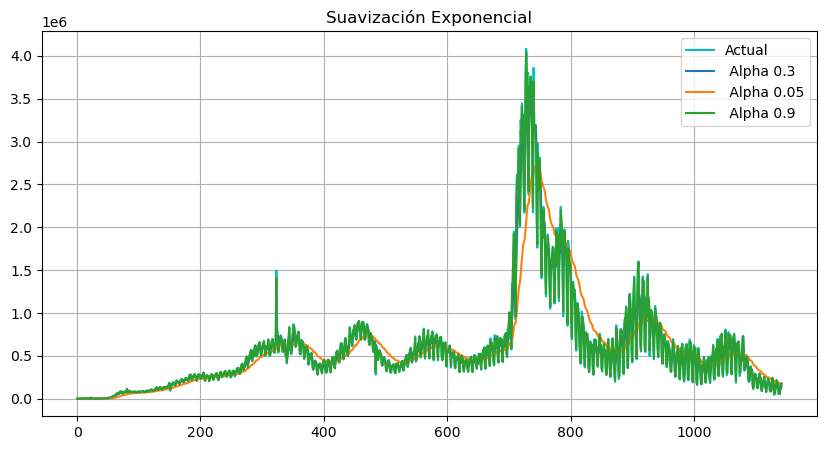

In [21]:
plot_exponential_smoothing(world_daily_increase_df['data'], [0.3, 0.05, 0.9])

<Axes: xlabel='dates'>

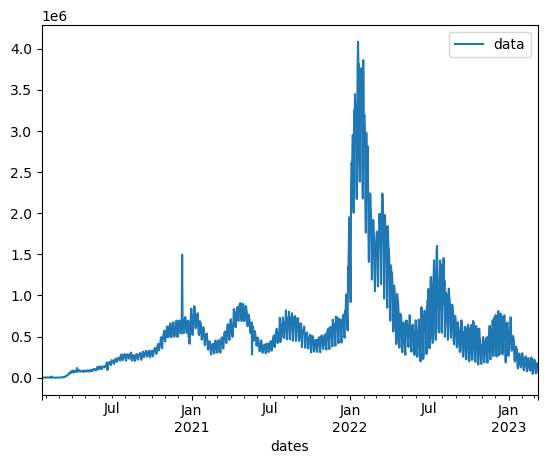

In [22]:
world_daily_increase_df['dates'] = pd.to_datetime(world_daily_increase_df['dates'], format = "%m/%d/%y")
world_daily_increase_df.set_index('dates', inplace=True)
world_daily_increase_df.plot()

In [23]:
alpha = 2 / (len(world_daily_increase_df['data'])+1)
print(alpha)

0.0017482517482517483


In [24]:
modelo_suavizacion_simple = SimpleExpSmoothing(world_daily_increase_df).fit(smoothing_level = alpha)
ajuste_exponencial_simple = modelo_suavizacion_simple.fittedvalues
pronosticos = modelo_suavizacion_simple.forecast(100)

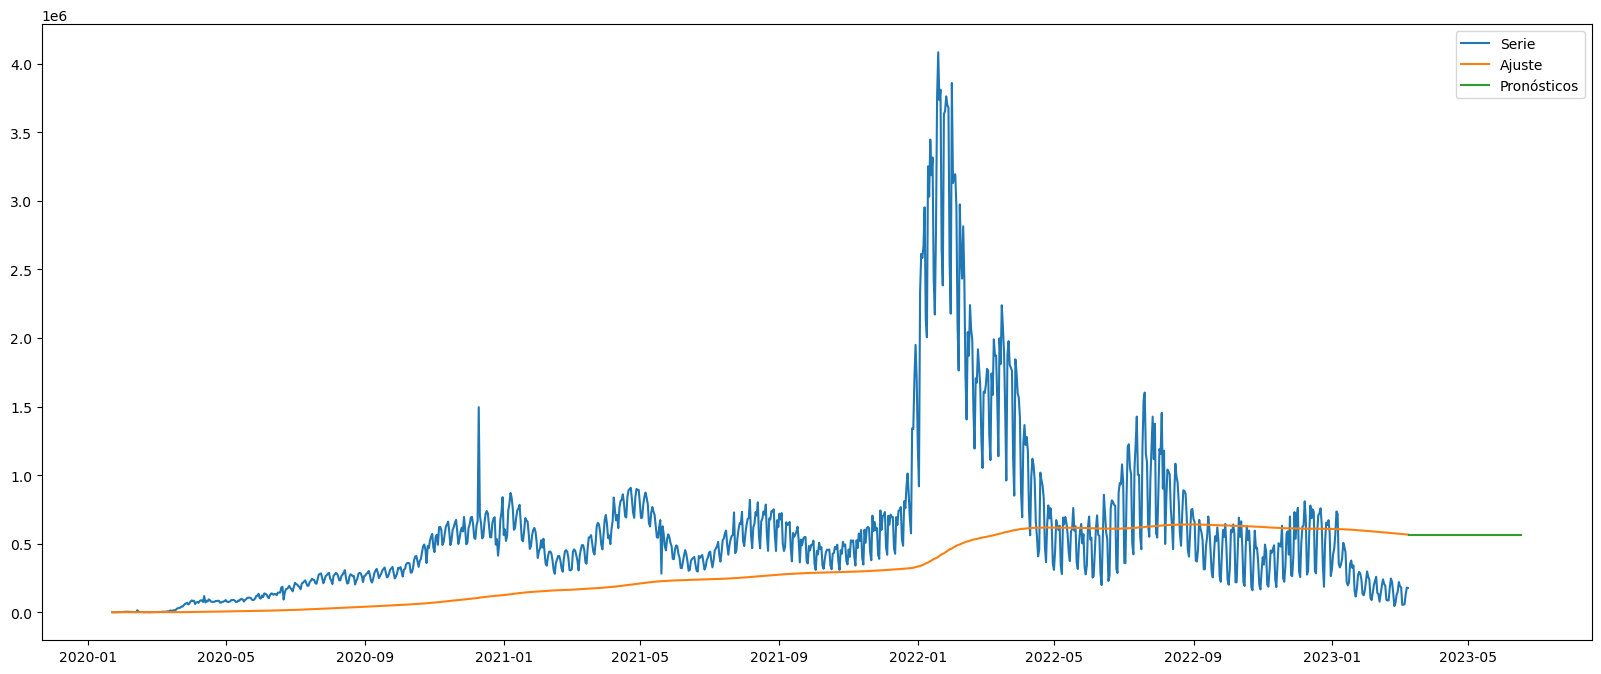

In [25]:
plt.figure(figsize=(20,8))
plt.plot(world_daily_increase_df, label = 'Serie')
plt.plot(ajuste_exponencial_simple, label = 'Ajuste')
plt.plot(pronosticos, label = 'Pronósticos')
plt.legend()
plt.show()

In [26]:
modelo_holt_winters = ExponentialSmoothing(world_daily_increase_df, trend='add', freq='D', seasonal='mul').fit()
ajuste_holt_winters = modelo_holt_winters.fittedvalues
pronostico_holt_winters = modelo_holt_winters.forecast(100)

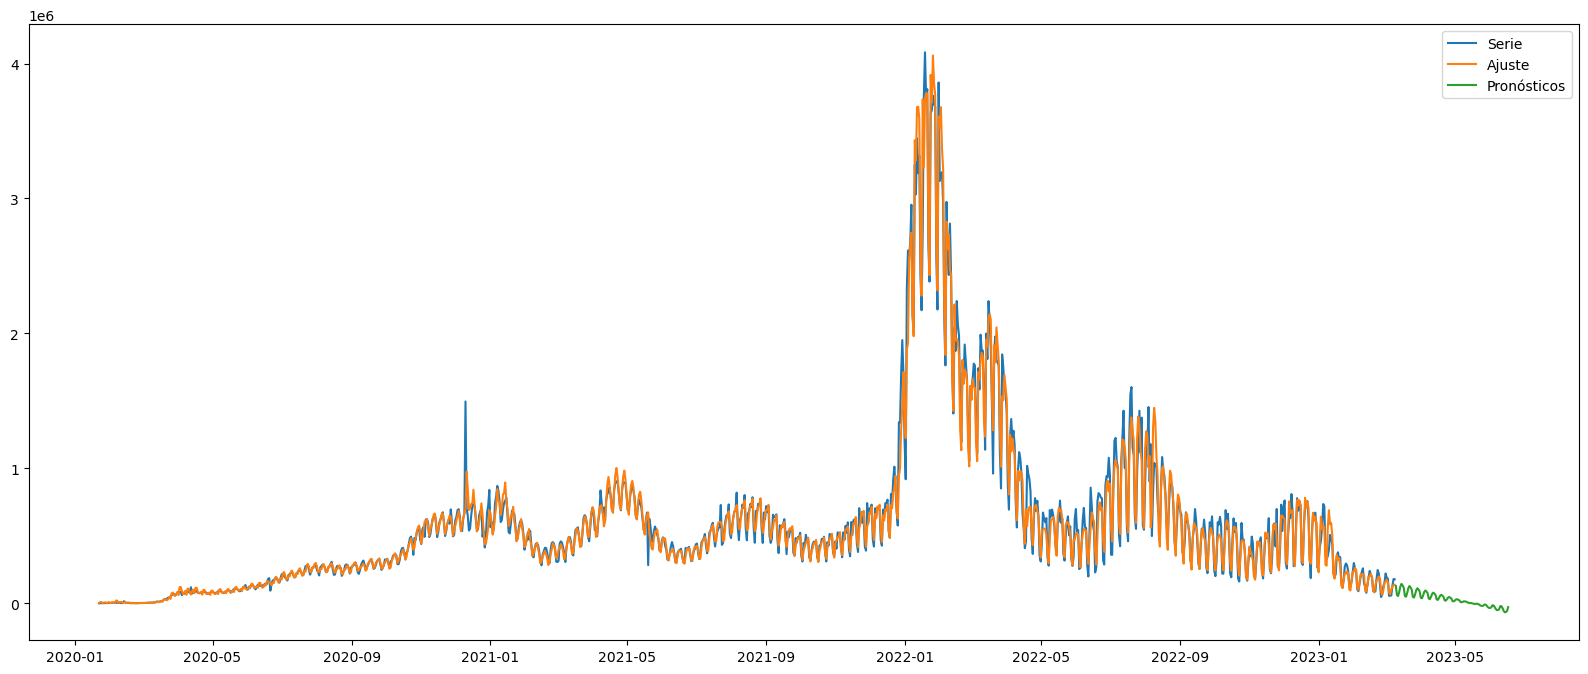

In [27]:
plt.figure(figsize=(20,8))
plt.plot(world_daily_increase_df, label = 'Serie')
plt.plot(ajuste_holt_winters, label = 'Ajuste')
plt.plot(pronostico_holt_winters, label = 'Pronósticos')
plt.legend()
plt.show()

## Modelos SARIMAX
> **La serie DEBE ser estacionaria**


S   | AR | I | MA | X
----|----|----|----|----
Estacional | Auto Regresivo | Integral | Media movil | variables exogenas
 | | cómo se comportó la serie en los n (parámetro) intervalos anteriores| Todas las transformaciones para volver la serie estacionaria | Promedio de una ventana en una serie |    |



Para la serie de covid la debemos convertir por alguna de las técnicas, como:

- Diferenciación

- Diferenciación por Logaritmación

- Logaritmación



### SARIMAX (p, d, q)(P,D,Q)f

> p Cantidad de rezagos
>
> d cantidad de transformaciones para que sea estacional
>
> q cantidad de valores esperados
>
> Mayúsculas representan lo mismo pero sobre la serie estacionaria
>
> f frecuencia estacional


### Autoregresión

Un valor futuro de la serie es una combinación lineal de los valores pasados de la misma

### Media móvil

Existe un evento externo que determina los eventos futuros de la misma. (El promedio)

###

